# Assignment No-16-Neural Network

# Problem Statement

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import classification_report as report
from sklearn.model_selection import GridSearchCV ,KFold,StratifiedGroupKFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

from tensorflow.keras import layers
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\bodak\AppData\Local\Temp\ipykernel_14288\3155760563.py:22: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
#Importing DataSet

In [3]:
forest= pd.read_csv(r"D:\ExcelR Solution\Data Science\Assignments\Assignment No-16-Neural Network\forestfires.csv")

In [4]:
forest

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [5]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [6]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
forest.shape

(517, 31)

In [8]:
forest.describe().T

count        mean         std   min    25%     50%     75%      max
FFMC      517.0   90.644681    5.520111  18.7   90.2   91.60   92.90    96.20
DMC       517.0  110.872340   64.046482   1.1   68.6  108.30  142.40   291.30
DC        517.0  547.940039  248.066192   7.9  437.7  664.20  713.90   860.60
ISI       517.0    9.021663    4.559477   0.0    6.5    8.40   10.80    56.10
temp      517.0   18.889168    5.806625   2.2   15.5   19.30   22.80    33.30
RH        517.0   44.288201   16.317469  15.0   33.0   42.00   53.00   100.00
wind      517.0    4.017602    1.791653   0.4    2.7    4.00    4.90     9.40
rain      517.0    0.021663    0.295959   0.0    0.0    0.00    0.00     6.40
area      517.0   12.847292   63.655818   0.0    0.0    0.52    6.57  1090.84
dayfri    517.0    0.164410    0.371006   0.0    0.0    0.00    0.00     1.00
daymon    517.0    0.143133    0.350548   0.0    0.0    0.00    0.00     1.00
daysat    517.0    0.162476    0.369244   0.0    0.0    0.00    0.00     1.00
daysun    517.0    0.183752    0.387657   0.0    0.0    0.00    0.00     1.00
daythu    517.0    0.117988    0.322907   0.0    0.0    0.00    0.00     1.00
daytue    517.0    0.123791    0.329662   0.0    0.0    0.00    0.00     1.00
daywed    517.0    0.104449    0.306138   0.0    0.0    0.00    0.00     1.00
monthapr  517.0    0.017408    0.130913   0.0    0.0    0.00    0.00     1.00
monthaug  517.0    0.355899    0.479249   0.0    0.0    0.00    1.00     1.00
monthdec  517.0    0.017408    0.130913   0.0    0.0    0.00    0.00     1.00
monthfeb  517.0    0.038685    0.193029   0.0    0.0    0.00    0.00     1.00
monthjan  517.0    0.003868    0.062137   0.0    0.0    0.00    0.00     1.00
monthjul  517.0    0.061896    0.241199   0.0    0.0    0.00    0.00     1.00
monthjun  517.0    0.032882    0.178500   0.0    0.0    0.00    0.00     1.00
monthmar  517.0    0.104449    0.306138   0.0    0.0    0.00    0.00     1.00
monthmay  517.0    0.003868    0.062137   0.0    0.0    0.00    0.00     1.00
monthnov  517.0    0.001934    0.043980   0.0    0.0    0.00    0.00     1.00
monthoct  517.0    0.029014    0.168007   0.0    0.0    0.00    0.00     1.00
monthsep  517.0    0.332689    0.471632   0.0    0.0    0.00    1.00     1.00

In [9]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
forest.isnull().any()

month            False
day              False
FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
dayfri           False
daymon           False
daysat           False
daysun           False
daythu           False
daytue           False
daywed           False
monthapr         False
monthaug         False
monthdec         False
monthfeb         False
monthjan         False
monthjul         False
monthjun         False
monthmar         False
monthmay         False
monthnov         False
monthoct         False
monthsep         False
size_category    False
dtype: bool

In [11]:
forest[forest.duplicated()]

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
53    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0  ...         0   
100   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0  ...         0   
215   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  ...         0   
303   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0  ...         0   
426   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0  ...         0   
461   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0  ...         0   
501   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8  ...         0   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
53          0         0         0         0         0         0         0   
100         0         0         0         0         0         0         0   
215         0         0         0         1         0         0         0   
303         0         0         1         0         0         0         0   
426         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
501         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         0   

     monthsep  size_category  
53          0          small  
100         0          small  
215         0          large  
303         0          small  
426         0          small  
461         0          small  
501         0          small  
508         0          small  

[8 rows x 31 columns]

In [12]:
forest[forest.duplicated()].shape

(8, 31)

In [13]:
forest.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [14]:
forest.corr()

FFMC       DMC        DC       ISI      temp        RH  \
FFMC      1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995   
DMC       0.382619  1.000000  0.682192  0.305128  0.469594  0.073795   
DC        0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192   
ISI       0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517   
temp      0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390   
RH       -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000   
wind     -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410   
rain      0.056702  0.074790  0.035861  0.067668  0.069491  0.099751   
area      0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519   
dayfri    0.019306 -0.012010 -0.004220  0.046695 -0.071949  0.064506   
daymon   -0.059396 -0.107921 -0.052993 -0.158601 -0.136529  0.009376   
daysat   -0.019637 -0.003653 -0.035189 -0.038585  0.034899 -0.023869   
daysun   -0.089517  0.025355 -0.001431 -0.003243  0.014403  0.136220   
daythu    0.071730  0.087672  0.051859 -0.022406  0.051432 -0.123061   
daytue    0.011225  0.000016  0.028368  0.068610  0.035630 -0.014211   
daywed    0.093908  0.017939  0.024803  0.125415  0.090580 -0.087508   
monthapr -0.117199 -0.197543 -0.268211 -0.106478 -0.157051  0.021235   
monthaug  0.228103  0.497928  0.279361  0.334639  0.351404  0.054761   
monthdec -0.137044 -0.176301 -0.105642 -0.162322 -0.329648 -0.047714   
monthfeb -0.281535 -0.317899 -0.399277 -0.249777 -0.320015  0.140430   
monthjan -0.454771 -0.105647 -0.115064 -0.103588 -0.146520  0.170923   
monthjul  0.031833 -0.001946 -0.100887  0.020982  0.142588  0.013185   
monthjun -0.040634 -0.050403 -0.186183  0.111516  0.051015  0.009382   
monthmar -0.074327 -0.407404 -0.650427 -0.143520 -0.341797 -0.089836   
monthmay -0.037230 -0.081980 -0.114209 -0.060493 -0.045540  0.086822   
monthnov -0.088964 -0.074218 -0.078380 -0.076559 -0.053798 -0.035885   
monthoct -0.005998 -0.187632  0.093279 -0.071154 -0.053513 -0.072334   
monthsep  0.076609  0.110907  0.531857 -0.068877  0.088006 -0.062596   

              wind      rain      area    dayfri  ...  monthdec  monthfeb  \
FFMC     -0.028485  0.056702  0.040122  0.019306  ... -0.137044 -0.281535   
DMC      -0.105342  0.074790  0.072994 -0.012010  ... -0.176301 -0.317899   
DC       -0.203466  0.035861  0.049383 -0.004220  ... -0.105642 -0.399277   
ISI       0.106826  0.067668  0.008258  0.046695  ... -0.162322 -0.249777   
temp     -0.227116  0.069491  0.097844 -0.071949  ... -0.329648 -0.320015   
RH        0.069410  0.099751 -0.075519  0.064506  ... -0.047714  0.140430   
wind      1.000000  0.061119  0.012317  0.118090  ...  0.269702 -0.029431   
rain      0.061119  1.000000 -0.007366 -0.004261  ... -0.009752 -0.014698   
area      0.012317 -0.007366  1.000000 -0.052911  ...  0.001010 -0.020732   
dayfri    0.118090 -0.004261 -0.052911  1.000000  ... -0.019140  0.046323   
daymon   -0.063881 -0.029945 -0.021206 -0.181293  ...  0.114519  0.003933   
daysat   -0.063799 -0.032271  0.087868 -0.195372  ... -0.058625  0.020406   
daysun    0.027981 -0.017872 -0.020463 -0.210462  ... -0.024966  0.008416   
daythu   -0.062553 -0.026798  0.020121 -0.162237  ... -0.002838 -0.042278   
daytue    0.053396  0.139311 -0.001333 -0.166728  ... -0.005125 -0.014491   
daywed   -0.019965 -0.020744 -0.011452 -0.151487  ...  0.002899 -0.035713   
monthapr  0.048266 -0.009752 -0.008280 -0.019140  ... -0.017717 -0.026701   
monthaug  0.028577  0.093101 -0.004187 -0.100837  ... -0.098941 -0.149116   
monthdec  0.269702 -0.009752  0.001010 -0.019140  ...  1.000000 -0.026701   
monthfeb -0.029431 -0.014698 -0.020732  0.046323  ... -0.026701  1.000000   
monthjan -0.070245 -0.004566 -0.012589 -0.027643  ... -0.008295 -0.012501   
monthjul -0.040645 -0.013390  0.006149 -0.048969  ... -0.034190 -0.051528   
monthjun  0.012124 -0.013510 -0.020314  0.006000  ... -0.024543 -0.036989   
monthmar  0.181433 -0.020744 -0.045596  0.036205  ... -0.045456 -0.068508   


In [15]:
forest.values

array([['mar', 'fri', 86.2, ..., 0, 0, 'small'],
       ['oct', 'tue', 90.6, ..., 1, 0, 'small'],
       ['oct', 'sat', 90.6, ..., 1, 0, 'small'],
       ...,
       ['aug', 'sun', 81.6, ..., 0, 0, 'large'],
       ['aug', 'sat', 94.4, ..., 0, 0, 'small'],
       ['nov', 'tue', 79.5, ..., 0, 0, 'small']], dtype=object)

# Data Visualization

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area'),
  Text(9.5, 0, 'dayfri'),
  Text(10.5, 0, 'daymon'),
  Text(11.5, 0, 'daysat'),
  Text(12.5, 0, 'daysun'),
  Text(13.5, 0, 'daythu'),
  Text(14.5, 0, 'daytue'),
  Text(15.5, 0, 'daywed'),
  Text(16.5, 0, 'monthapr'),
  Text(17.5, 0, 'monthaug'),
  Text(18.5, 0, 'monthdec'),
  Text(19.5, 0, 'monthfeb'),
  Text(20.5, 0, 'monthjan'),
  Text(21.5, 0, 'monthjul'),
  Text(22.5, 0, 'monthjun'),
  Text(23.5, 0, 'monthmar'),
  Text(24.5, 0, 'monthmay'),
  Text(25.5, 0, 'monthnov'),
  Text(26.5, 0, 'monthoct'),
  Text(27.5, 0, 'monthsep')])

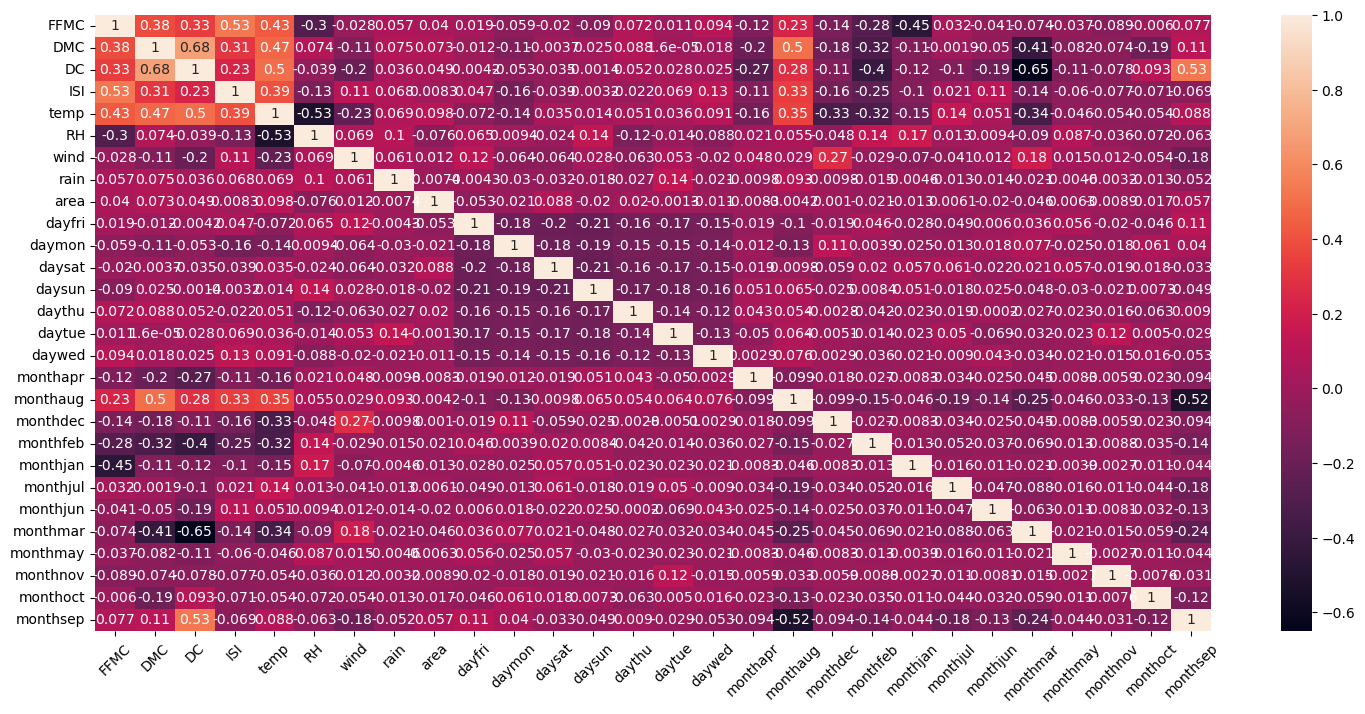

In [16]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(forest.corr(), annot=True);
plt.xticks(rotation=45)

<AxesSubplot:>

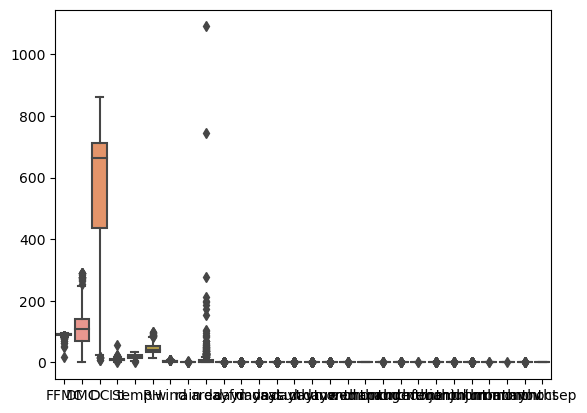

In [17]:
sns.boxplot(data=forest)

<AxesSubplot:>

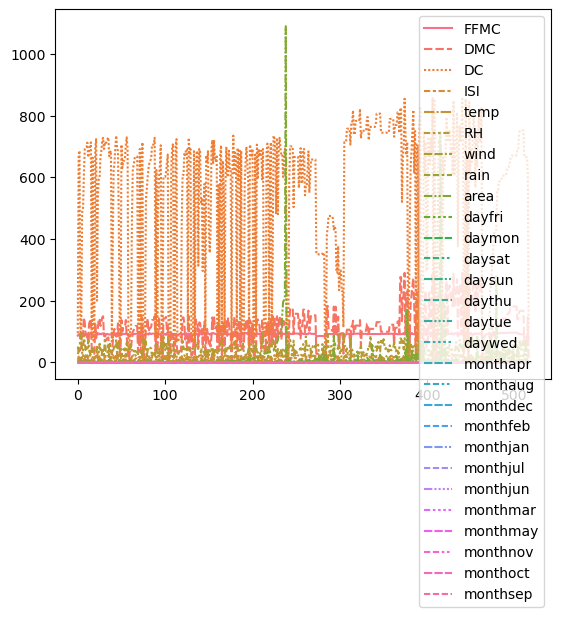

In [18]:
sns.lineplot(data=forest)

<AxesSubplot:>

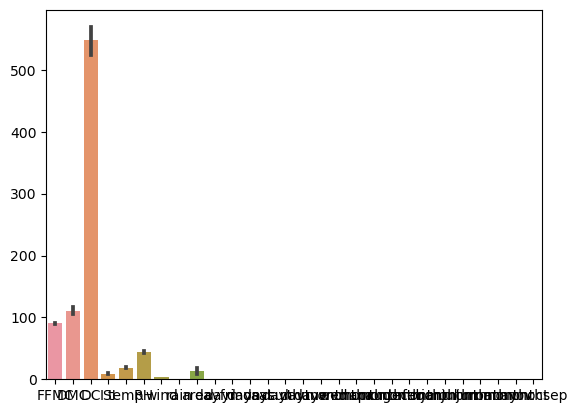

In [19]:
sns.barplot(data=forest)

<AxesSubplot:ylabel='count'>

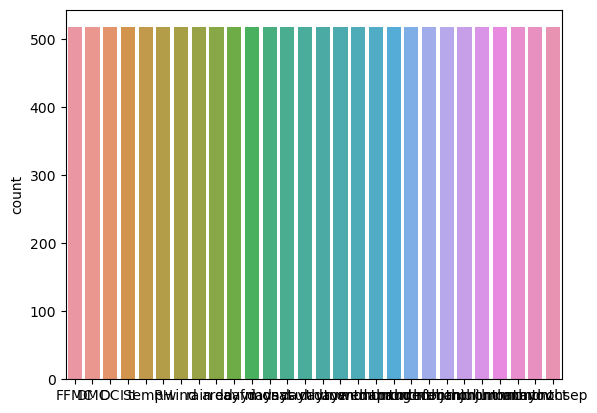

In [20]:
sns.countplot(data=forest)

array([[<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'dayfri'}>],
       [<AxesSubplot:title={'center':'daymon'}>,
        <AxesSubplot:title={'center':'daysat'}>,
        <AxesSubplot:title={'center':'daysun'}>,
        <AxesSubplot:title={'center':'daythu'}>,
        <AxesSubplot:title={'center':'daytue'}>],
       [<AxesSubplot:title={'center':'daywed'}>,
        <AxesSubplot:title={'center':'monthapr'}>,
        <AxesSubplot:title={'center':'monthaug'}>,
        <AxesSubplot:title={'center':'monthdec'}>,
        <AxesSubplot:title={'center':'monthfeb'}>],
       [<AxesSubplot:title={'cen

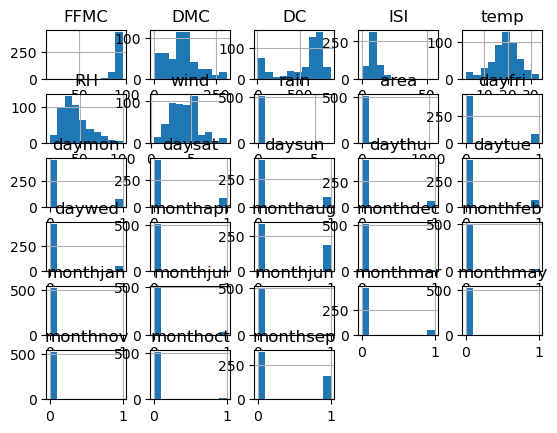

In [21]:
forest.hist()

In [22]:
#As dummy variables are already created, we will remove the month and alsoday columns
forest.drop(["month","day"],axis=1,inplace = True)

In [23]:
forest

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0          small  
1           1         0          small  
2           1         0          small  
3           0         0          small  
4           0         0          small  
..        ...       ...            ...  
512         0         0          large  
513         0         0          large  
514         0         0          large  
515         0         0          small  
516         0         0          small  

[517 rows x 29 columns]

In [24]:
forest["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [25]:
forest.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [26]:
forest.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818    0.371006  ...    0.130913   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.520000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.570000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.038685    0.003868    0.061896    0.032882    0.104449    0.003868   
std      0.193029    0.062137    0.241199    0.178500    0.306138    0.062137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  
mean     0.001934    0.029014    0.332689  
std      0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [27]:
##I am taking small as 0 and large as 1
forest.loc[forest["size_category"]=='small','size_category']=0

In [28]:
forest.loc[forest["size_category"]=='large','size_category']=1

In [29]:
forest["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [30]:
#Normalization being done.
def norm_func(i):
     x = (i-i.min())/(i.max()-i.min())
     return (x)

In [31]:
norm_func

<function __main__.norm_func(i)>

In [32]:
predictors = forest.iloc[:,0:28]

In [33]:
target = forest.iloc[:,28]

In [34]:
predictors

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep  
0           0         0         0  
1           0         1         0  
2           0         1         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
512         0         0         0  
513         0         0         0  
514         0         0         0  
515         0         0         0  
516         1         0         0  

[517 rows x 28 columns]

In [35]:
target

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: object

In [36]:
predictors1 = norm_func(predictors)

In [37]:
predictors1

FFMC       DMC        DC       ISI      temp        RH      wind  \
0    0.870968  0.086492  0.101325  0.090909  0.192926  0.423529  0.700000   
1    0.927742  0.118194  0.775419  0.119430  0.508039  0.211765  0.055556   
2    0.927742  0.146795  0.796294  0.119430  0.398714  0.211765  0.100000   
3    0.941935  0.110958  0.081623  0.160428  0.196141  0.964706  0.400000   
4    0.910968  0.172984  0.110590  0.171123  0.295820  0.988235  0.155556   
..        ...       ...       ...       ...       ...       ...       ...   
512  0.811613  0.191592  0.771315  0.033868  0.823151  0.200000  0.255556   
513  0.811613  0.191592  0.771315  0.033868  0.633441  0.658824  0.600000   
514  0.811613  0.191592  0.771315  0.033868  0.610932  0.647059  0.700000   
515  0.976774  0.499311  0.711622  0.201426  0.752412  0.317647  0.400000   
516  0.784516  0.006547  0.115867  0.019608  0.308682  0.188235  0.455556   

        rain      area  dayfri  ...  monthdec  monthfeb  monthjan  monthjul  \
0    0.00000  0.000000     1.0  ...       0.0       0.0       0.0       0.0   
1    0.00000  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
2    0.00000  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
3    0.03125  0.000000     1.0  ...       0.0       0.0       0.0       0.0   
4    0.00000  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
..       ...       ...     ...  ...       ...       ...       ...       ...   
512  0.00000  0.005904     0.0  ...       0.0       0.0       0.0       0.0   
513  0.00000  0.049769     0.0  ...       0.0       0.0       0.0       0.0   
514  0.00000  0.010231     0.0  ...       0.0       0.0       0.0       0.0   
515  0.00000  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
516  0.00000  0.000000     0.0  ...       0.0       0.0       0.0       0.0   

     monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  
0         0.0       1.0       0.0       0.0       0.0       0.0  
1         0.0       0.0       0.0       0.0       1.0       0.0  
2         0.0       0.0       0.0       0.0       1.0       0.0  
3         0.0       1.0       0.0       0.0       0.0       0.0  
4         0.0       1.0       0.0       0.0       0.0       0.0  
..        ...       ...       ...       ...       ...       ...  
512       0.0       0.0       0.0       0.0       0.0       0.0  
513       0.0       0.0       0.0       0.0       0.0       0.0  
514       0.0       0.0       0.0       0.0       0.0       0.0  
515       0.0       0.0       0.0       0.0       0.0       0.0  
516       0.0       0.0       0.0       1.0       0.0       0.0  

[517 rows x 28 columns]

In [38]:
data = pd.concat([predictors1,target],axis=1)

In [39]:
data

FFMC       DMC        DC       ISI      temp        RH      wind  \
0    0.870968  0.086492  0.101325  0.090909  0.192926  0.423529  0.700000   
1    0.927742  0.118194  0.775419  0.119430  0.508039  0.211765  0.055556   
2    0.927742  0.146795  0.796294  0.119430  0.398714  0.211765  0.100000   
3    0.941935  0.110958  0.081623  0.160428  0.196141  0.964706  0.400000   
4    0.910968  0.172984  0.110590  0.171123  0.295820  0.988235  0.155556   
..        ...       ...       ...       ...       ...       ...       ...   
512  0.811613  0.191592  0.771315  0.033868  0.823151  0.200000  0.255556   
513  0.811613  0.191592  0.771315  0.033868  0.633441  0.658824  0.600000   
514  0.811613  0.191592  0.771315  0.033868  0.610932  0.647059  0.700000   
515  0.976774  0.499311  0.711622  0.201426  0.752412  0.317647  0.400000   
516  0.784516  0.006547  0.115867  0.019608  0.308682  0.188235  0.455556   

        rain      area  dayfri  ...  monthfeb  monthjan  monthjul  monthjun  \
0    0.00000  0.000000     1.0  ...       0.0       0.0       0.0       0.0   
1    0.00000  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
2    0.00000  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
3    0.03125  0.000000     1.0  ...       0.0       0.0       0.0       0.0   
4    0.00000  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
..       ...       ...     ...  ...       ...       ...       ...       ...   
512  0.00000  0.005904     0.0  ...       0.0       0.0       0.0       0.0   
513  0.00000  0.049769     0.0  ...       0.0       0.0       0.0       0.0   
514  0.00000  0.010231     0.0  ...       0.0       0.0       0.0       0.0   
515  0.00000  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
516  0.00000  0.000000     0.0  ...       0.0       0.0       0.0       0.0   

     monthmar  monthmay  monthnov  monthoct  monthsep  size_category  
0         1.0       0.0       0.0       0.0       0.0              0  
1         0.0       0.0       0.0       1.0       0.0              0  
2         0.0       0.0       0.0       1.0       0.0              0  
3         1.0       0.0       0.0       0.0       0.0              0  
4         1.0       0.0       0.0       0.0       0.0              0  
..        ...       ...       ...       ...       ...            ...  
512       0.0       0.0       0.0       0.0       0.0              1  
513       0.0       0.0       0.0       0.0       0.0              1  
514       0.0       0.0       0.0       0.0       0.0              1  
515       0.0       0.0       0.0       0.0       0.0              0  
516       0.0       0.0       1.0       0.0       0.0              0  

[517 rows x 29 columns]

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test= train_test_split(predictors1,target, test_size=0.3,stratify = target)

In [42]:
x_train

FFMC       DMC        DC       ISI      temp        RH      wind  \
333  0.947097  0.298415  0.836402  0.169340  0.511254  0.458824  0.300000   
116  0.941935  0.119573  0.085493  0.139037  0.302251  0.176471  0.655556   
380  0.967742  0.345279  0.528791  0.212121  0.549839  0.282353  0.755556   
212  0.975484  0.289456  0.802627  0.283422  0.575563  0.376471  0.500000   
432  0.981935  0.762578  0.810015  0.247772  0.697749  0.270588  0.700000   
..        ...       ...       ...       ...       ...       ...       ...   
336  0.940645  0.369745  0.886713  0.110517  0.549839  0.341176  0.200000   
247  0.948387  0.311854  0.581330  0.171123  0.594855  0.647059  0.200000   
185  0.932903  0.442453  0.802979  0.124777  0.495177  0.364706  0.300000   
515  0.976774  0.499311  0.711622  0.201426  0.752412  0.317647  0.400000   
414  0.966452  0.806340  0.838748  0.180036  0.704180  0.411765  0.400000   

     rain      area  dayfri  ...  monthdec  monthfeb  monthjan  monthjul  \
333   0.0  0.001953     0.0  ...       0.0       0.0       0.0       0.0   
116   0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
380   0.0  0.007086     0.0  ...       0.0       0.0       0.0       1.0   
212   0.0  0.023954     1.0  ...       0.0       0.0       0.0       0.0   
432   0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
..    ...       ...     ...  ...       ...       ...       ...       ...   
336   0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
247   0.0  0.000688     0.0  ...       0.0       0.0       0.0       0.0   
185   0.0  0.006454     0.0  ...       0.0       0.0       0.0       0.0   
515   0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
414   0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   

     monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  
333       0.0       0.0       0.0       0.0       0.0       1.0  
116       0.0       1.0       0.0       0.0       0.0       0.0  
380       0.0       0.0       0.0       0.0       0.0       0.0  
212       0.0       0.0       0.0       0.0       0.0       1.0  
432       0.0       0.0       0.0       0.0       0.0       0.0  
..        ...       ...       ...       ...       ...       ...  
336       0.0       0.0       0.0       0.0       0.0       1.0  
247       0.0       0.0       0.0       0.0       0.0       0.0  
185       0.0       0.0       0.0       0.0       0.0       1.0  
515       0.0       0.0       0.0       0.0       0.0       0.0  
414       0.0       0.0       0.0       0.0       0.0       0.0  

[361 rows x 28 columns]

In [43]:
x_test

FFMC       DMC        DC       ISI      temp        RH      wind  \
433  0.966452  0.806340  0.838748  0.180036  0.601286  0.600000  0.500000   
352  0.947097  0.337354  0.864782  0.171123  0.591640  0.329412  0.355556   
340  0.940645  0.369745  0.886713  0.110517  0.549839  0.341176  0.200000   
57   0.953548  0.156444  0.802041  0.156863  0.372990  0.411765  0.255556   
21   0.943226  0.266713  0.840155  0.163993  0.543408  0.270588  0.255556   
..        ...       ...       ...       ...       ...       ...       ...   
152  0.921290  0.172640  0.488097  0.110517  0.720257  0.329412  0.155556   
391  0.934194  0.310820  0.856339  0.128342  0.594855  0.364706  0.255556   
416  0.954839  0.561682  0.666002  0.158645  0.774920  0.282353  0.300000   
246  0.943226  0.599586  0.812478  0.245989  0.755627  0.282353  0.555556   
374  0.923871  0.995520  0.993784  0.131907  0.260450  0.741176  0.400000   

     rain      area  dayfri  ...  monthdec  monthfeb  monthjan  monthjul  \
433   0.0  0.014063     0.0  ...       0.0       0.0       0.0       0.0   
352   0.0  0.001861     1.0  ...       0.0       0.0       0.0       0.0   
340   0.0  0.003603     0.0  ...       0.0       0.0       0.0       0.0   
57    0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
21    0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
..    ...       ...     ...  ...       ...       ...       ...       ...   
152   0.0  0.001311     0.0  ...       0.0       0.0       0.0       1.0   
391   0.0  0.027667     1.0  ...       0.0       0.0       0.0       0.0   
416   0.0  0.006435     0.0  ...       0.0       0.0       0.0       1.0   
246   0.0  0.000083     0.0  ...       0.0       0.0       0.0       0.0   
374   0.0  0.016776     1.0  ...       0.0       0.0       0.0       0.0   

     monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  
433       0.0       0.0       0.0       0.0       0.0       0.0  
352       0.0       0.0       0.0       0.0       0.0       1.0  
340       0.0       0.0       0.0       0.0       0.0       1.0  
57        0.0       0.0       0.0       0.0       1.0       0.0  
21        0.0       0.0       0.0       0.0       0.0       1.0  
..        ...       ...       ...       ...       ...       ...  
152       0.0       0.0       0.0       0.0       0.0       0.0  
391       0.0       0.0       0.0       0.0       0.0       1.0  
416       0.0       0.0       0.0       0.0       0.0       0.0  
246       0.0       0.0       0.0       0.0       0.0       0.0  
374       0.0       0.0       0.0       0.0       0.0       1.0  

[156 rows x 28 columns]

In [44]:
y_train

333    0
116    0
380    1
212    1
432    0
      ..
336    0
247    0
185    1
515    0
414    0
Name: size_category, Length: 361, dtype: object

In [45]:
y_test

433    1
352    0
340    0
57     0
21     0
      ..
152    0
391    1
416    1
246    0
374    1
Name: size_category, Length: 156, dtype: object

In [46]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model 

In [47]:
y_train = pd.DataFrame(y_train)

In [48]:
y_train

size_category
333             0
116             0
380             1
212             1
432             0
..            ...
336             0
247             0
185             1
515             0
414             0

[361 rows x 1 columns]

In [49]:
first_model = prep_model([28,50,40,20,1])

In [50]:
first_model

In [51]:
first_model

In [52]:
pred_train = first_model.predict(np.array(x_train))

12/12 [==============================] - 0s 3ms/step


In [53]:
#Converting the predicted values to series 
pred_train = pd.Series([i[0] for i in pred_train])

In [54]:
pred_train

0      0.496079
1      0.492832
2      0.495187
3      0.494016
4      0.493244
         ...   
356    0.495966
357    0.496157
358    0.495817
359    0.492028
360    0.496097
Length: 361, dtype: float32

In [55]:
size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"

In [56]:
pred_train_class

0      small
1      small
2      small
3      small
4      small
       ...  
356    small
357    small
358    small
359    small
360    small
Length: 361, dtype: object

In [57]:
train = pd.concat([x_train,y_train],axis=1)

In [58]:
train

FFMC       DMC        DC       ISI      temp        RH      wind  \
333  0.947097  0.298415  0.836402  0.169340  0.511254  0.458824  0.300000   
116  0.941935  0.119573  0.085493  0.139037  0.302251  0.176471  0.655556   
380  0.967742  0.345279  0.528791  0.212121  0.549839  0.282353  0.755556   
212  0.975484  0.289456  0.802627  0.283422  0.575563  0.376471  0.500000   
432  0.981935  0.762578  0.810015  0.247772  0.697749  0.270588  0.700000   
..        ...       ...       ...       ...       ...       ...       ...   
336  0.940645  0.369745  0.886713  0.110517  0.549839  0.341176  0.200000   
247  0.948387  0.311854  0.581330  0.171123  0.594855  0.647059  0.200000   
185  0.932903  0.442453  0.802979  0.124777  0.495177  0.364706  0.300000   
515  0.976774  0.499311  0.711622  0.201426  0.752412  0.317647  0.400000   
414  0.966452  0.806340  0.838748  0.180036  0.704180  0.411765  0.400000   

     rain      area  dayfri  ...  monthfeb  monthjan  monthjul  monthjun  \
333   0.0  0.001953     0.0  ...       0.0       0.0       0.0       0.0   
116   0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
380   0.0  0.007086     0.0  ...       0.0       0.0       1.0       0.0   
212   0.0  0.023954     1.0  ...       0.0       0.0       0.0       0.0   
432   0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
..    ...       ...     ...  ...       ...       ...       ...       ...   
336   0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
247   0.0  0.000688     0.0  ...       0.0       0.0       0.0       0.0   
185   0.0  0.006454     0.0  ...       0.0       0.0       0.0       0.0   
515   0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
414   0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   

     monthmar  monthmay  monthnov  monthoct  monthsep  size_category  
333       0.0       0.0       0.0       0.0       1.0              0  
116       1.0       0.0       0.0       0.0       0.0              0  
380       0.0       0.0       0.0       0.0       0.0              1  
212       0.0       0.0       0.0       0.0       1.0              1  
432       0.0       0.0       0.0       0.0       0.0              0  
..        ...       ...       ...       ...       ...            ...  
336       0.0       0.0       0.0       0.0       1.0              0  
247       0.0       0.0       0.0       0.0       0.0              0  
185       0.0       0.0       0.0       0.0       1.0              1  
515       0.0       0.0       0.0       0.0       0.0              0  
414       0.0       0.0       0.0       0.0       0.0              0  

[361 rows x 29 columns]

In [59]:
train["size_category"].value_counts()

0    264
1     97
Name: size_category, dtype: int64

In [60]:
#For training data

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
train["original_class"] = "small"

In [63]:
train.loc[train["size_category"]==1,"original_class"] = "large"

In [64]:
train.original_class.value_counts()

small    264
large     97
Name: original_class, dtype: int64

In [65]:
confusion_matrix(pred_train_class,train["original_class"])

array([[  0,   3],
       [ 97, 261]], dtype=int64)

In [66]:
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True)) #100%

0.7229916897506925

In [67]:
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))

original_class  large  small
row_0                       
large               0      3
small              97    261

In [68]:
#For test data

In [69]:
pred_test = first_model.predict(np.array(x_test))

5/5 [==============================] - 0s 2ms/step


In [70]:
pred_test = pd.Series([i[0] for i in pred_test])

In [71]:
pred_test

0      0.495723
1      0.493733
2      0.495966
3      0.497822
4      0.495955
         ...   
151    0.491883
152    0.493620
153    0.494999
154    0.496473
155    0.494746
Length: 156, dtype: float32

In [72]:
pred_test_class = pd.Series(["small"]*156)

In [73]:
pred_test

0      0.495723
1      0.493733
2      0.495966
3      0.497822
4      0.495955
         ...   
151    0.491883
152    0.493620
153    0.494999
154    0.496473
155    0.494746
Length: 156, dtype: float32

In [74]:
pred_test_class[[i>0.5 for i in pred_test]] = "large"

In [75]:
pred_test_class

0      small
1      small
2      small
3      small
4      small
       ...  
151    small
152    small
153    small
154    small
155    small
Length: 156, dtype: object

In [76]:
test =pd.concat([x_test,y_test],axis=1)

In [77]:
test

FFMC       DMC        DC       ISI      temp        RH      wind  \
433  0.966452  0.806340  0.838748  0.180036  0.601286  0.600000  0.500000   
352  0.947097  0.337354  0.864782  0.171123  0.591640  0.329412  0.355556   
340  0.940645  0.369745  0.886713  0.110517  0.549839  0.341176  0.200000   
57   0.953548  0.156444  0.802041  0.156863  0.372990  0.411765  0.255556   
21   0.943226  0.266713  0.840155  0.163993  0.543408  0.270588  0.255556   
..        ...       ...       ...       ...       ...       ...       ...   
152  0.921290  0.172640  0.488097  0.110517  0.720257  0.329412  0.155556   
391  0.934194  0.310820  0.856339  0.128342  0.594855  0.364706  0.255556   
416  0.954839  0.561682  0.666002  0.158645  0.774920  0.282353  0.300000   
246  0.943226  0.599586  0.812478  0.245989  0.755627  0.282353  0.555556   
374  0.923871  0.995520  0.993784  0.131907  0.260450  0.741176  0.400000   

     rain      area  dayfri  ...  monthfeb  monthjan  monthjul  monthjun  \
433   0.0  0.014063     0.0  ...       0.0       0.0       0.0       0.0   
352   0.0  0.001861     1.0  ...       0.0       0.0       0.0       0.0   
340   0.0  0.003603     0.0  ...       0.0       0.0       0.0       0.0   
57    0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
21    0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
..    ...       ...     ...  ...       ...       ...       ...       ...   
152   0.0  0.001311     0.0  ...       0.0       0.0       1.0       0.0   
391   0.0  0.027667     1.0  ...       0.0       0.0       0.0       0.0   
416   0.0  0.006435     0.0  ...       0.0       0.0       1.0       0.0   
246   0.0  0.000083     0.0  ...       0.0       0.0       0.0       0.0   
374   0.0  0.016776     1.0  ...       0.0       0.0       0.0       0.0   

     monthmar  monthmay  monthnov  monthoct  monthsep  size_category  
433       0.0       0.0       0.0       0.0       0.0              1  
352       0.0       0.0       0.0       0.0       1.0              0  
340       0.0       0.0       0.0       0.0       1.0              0  
57        0.0       0.0       0.0       1.0       0.0              0  
21        0.0       0.0       0.0       0.0       1.0              0  
..        ...       ...       ...       ...       ...            ...  
152       0.0       0.0       0.0       0.0       0.0              0  
391       0.0       0.0       0.0       0.0       1.0              1  
416       0.0       0.0       0.0       0.0       0.0              1  
246       0.0       0.0       0.0       0.0       0.0              0  
374       0.0       0.0       0.0       0.0       1.0              1  

[156 rows x 29 columns]

In [78]:
test["original_class"]="small"

In [79]:
test

FFMC       DMC        DC       ISI      temp        RH      wind  \
433  0.966452  0.806340  0.838748  0.180036  0.601286  0.600000  0.500000   
352  0.947097  0.337354  0.864782  0.171123  0.591640  0.329412  0.355556   
340  0.940645  0.369745  0.886713  0.110517  0.549839  0.341176  0.200000   
57   0.953548  0.156444  0.802041  0.156863  0.372990  0.411765  0.255556   
21   0.943226  0.266713  0.840155  0.163993  0.543408  0.270588  0.255556   
..        ...       ...       ...       ...       ...       ...       ...   
152  0.921290  0.172640  0.488097  0.110517  0.720257  0.329412  0.155556   
391  0.934194  0.310820  0.856339  0.128342  0.594855  0.364706  0.255556   
416  0.954839  0.561682  0.666002  0.158645  0.774920  0.282353  0.300000   
246  0.943226  0.599586  0.812478  0.245989  0.755627  0.282353  0.555556   
374  0.923871  0.995520  0.993784  0.131907  0.260450  0.741176  0.400000   

     rain      area  dayfri  ...  monthjan  monthjul  monthjun  monthmar  \
433   0.0  0.014063     0.0  ...       0.0       0.0       0.0       0.0   
352   0.0  0.001861     1.0  ...       0.0       0.0       0.0       0.0   
340   0.0  0.003603     0.0  ...       0.0       0.0       0.0       0.0   
57    0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
21    0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
..    ...       ...     ...  ...       ...       ...       ...       ...   
152   0.0  0.001311     0.0  ...       0.0       1.0       0.0       0.0   
391   0.0  0.027667     1.0  ...       0.0       0.0       0.0       0.0   
416   0.0  0.006435     0.0  ...       0.0       1.0       0.0       0.0   
246   0.0  0.000083     0.0  ...       0.0       0.0       0.0       0.0   
374   0.0  0.016776     1.0  ...       0.0       0.0       0.0       0.0   

     monthmay  monthnov  monthoct  monthsep  size_category  original_class  
433       0.0       0.0       0.0       0.0              1           small  
352       0.0       0.0       0.0       1.0              0           small  
340       0.0       0.0       0.0       1.0              0           small  
57        0.0       0.0       1.0       0.0              0           small  
21        0.0       0.0       0.0       1.0              0           small  
..        ...       ...       ...       ...            ...             ...  
152       0.0       0.0       0.0       0.0              0           small  
391       0.0       0.0       0.0       1.0              1           small  
416       0.0       0.0       0.0       0.0              1           small  
246       0.0       0.0       0.0       0.0              0           small  
374       0.0       0.0       0.0       1.0              1           small  

[156 rows x 30 columns]

In [80]:
test.loc[test["size_category"]==1,"original_class"] = "large"

In [81]:
test

FFMC       DMC        DC       ISI      temp        RH      wind  \
433  0.966452  0.806340  0.838748  0.180036  0.601286  0.600000  0.500000   
352  0.947097  0.337354  0.864782  0.171123  0.591640  0.329412  0.355556   
340  0.940645  0.369745  0.886713  0.110517  0.549839  0.341176  0.200000   
57   0.953548  0.156444  0.802041  0.156863  0.372990  0.411765  0.255556   
21   0.943226  0.266713  0.840155  0.163993  0.543408  0.270588  0.255556   
..        ...       ...       ...       ...       ...       ...       ...   
152  0.921290  0.172640  0.488097  0.110517  0.720257  0.329412  0.155556   
391  0.934194  0.310820  0.856339  0.128342  0.594855  0.364706  0.255556   
416  0.954839  0.561682  0.666002  0.158645  0.774920  0.282353  0.300000   
246  0.943226  0.599586  0.812478  0.245989  0.755627  0.282353  0.555556   
374  0.923871  0.995520  0.993784  0.131907  0.260450  0.741176  0.400000   

     rain      area  dayfri  ...  monthjan  monthjul  monthjun  monthmar  \
433   0.0  0.014063     0.0  ...       0.0       0.0       0.0       0.0   
352   0.0  0.001861     1.0  ...       0.0       0.0       0.0       0.0   
340   0.0  0.003603     0.0  ...       0.0       0.0       0.0       0.0   
57    0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
21    0.0  0.000000     0.0  ...       0.0       0.0       0.0       0.0   
..    ...       ...     ...  ...       ...       ...       ...       ...   
152   0.0  0.001311     0.0  ...       0.0       1.0       0.0       0.0   
391   0.0  0.027667     1.0  ...       0.0       0.0       0.0       0.0   
416   0.0  0.006435     0.0  ...       0.0       1.0       0.0       0.0   
246   0.0  0.000083     0.0  ...       0.0       0.0       0.0       0.0   
374   0.0  0.016776     1.0  ...       0.0       0.0       0.0       0.0   

     monthmay  monthnov  monthoct  monthsep  size_category  original_class  
433       0.0       0.0       0.0       0.0              1           large  
352       0.0       0.0       0.0       1.0              0           small  
340       0.0       0.0       0.0       1.0              0           small  
57        0.0       0.0       1.0       0.0              0           small  
21        0.0       0.0       0.0       1.0              0           small  
..        ...       ...       ...       ...            ...             ...  
152       0.0       0.0       0.0       0.0              0           small  
391       0.0       0.0       0.0       1.0              1           large  
416       0.0       0.0       0.0       0.0              1           large  
246       0.0       0.0       0.0       0.0              0           small  
374       0.0       0.0       0.0       1.0              1           large  

[156 rows x 30 columns]

In [82]:
test["original_class"].value_counts()

small    114
large     42
Name: original_class, dtype: int64

In [83]:
np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True)) # 85%

0.7307692307692307

In [84]:
confusion_matrix(pred_test_class,test["original_class"])

array([[  0,   0],
       [ 42, 114]], dtype=int64)

In [85]:
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))

original_class  large  small
row_0                       
small              42    114

In [86]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [87]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = pd.read_csv("D:\\ExcelR Solution\\Data Science\\Assignments\\Assignment No-16-Neural Network\\forestfires.csv")
# split into input (X) and output (Y) variables
X=forest.iloc[:,0:12]
Y=forest.iloc[:,12]

In [88]:
X

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  daymon  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1       0   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0       0   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0       0   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1       0   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0       0   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...     ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0       0   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0       0   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0       0   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0       0   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0       0   

     daysat  
0         0  
1         0  
2         1  
3         0  
4         0  
..      ...  
512       0  
513       0  
514       0  
515       1  
516       0  

[517 rows x 12 columns]

In [89]:
Y

0      0
1      0
2      0
3      0
4      1
      ..
512    1
513    1
514    1
515    0
516    0
Name: daysun, Length: 517, dtype: int64

In [90]:
X=forest.iloc[:,0:12]
Y=forest.iloc[:,12]

In [91]:
X

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  daymon  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1       0   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0       0   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0       0   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1       0   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0       0   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...     ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0       0   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0       0   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0       0   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0       0   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0       0   

     daysat  
0         0  
1         0  
2         1  
3         0  
4         0  
..      ...  
512       0  
513       0  
514       0  
515       1  
516       0  

[517 rows x 12 columns]

In [92]:
Y

0      0
1      0
2      0
3      0
4      1
      ..
512    1
513    1
514    1
515    0
516    0
Name: daysun, Length: 517, dtype: int64

# Numerical Variables

In [93]:
# List of Numerical Variables
numerical_features=[feature for feature in forest.columns if forest[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
forest[numerical_features].head()

Number of numerical variables: 28


FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  ...  monthdec  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1  ...         0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0  ...         0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0  ...         0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1  ...         0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0  ...         0   

   monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   monthoct  monthsep  
0         0         0  
1         1         0  
2         1         0  
3         0         0  
4         0         0  

[5 rows x 28 columns]

In [94]:
discrete_feature=[feature for feature in numerical_features if len(forest[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 21


In [95]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [96]:
 #find categorical variables

categorical = [var for var in forest.columns if forest[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 1 categorical variables

The categorical variables are :

 ['size_category']


In [97]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(forest[var].value_counts())

0    378
1    139
Name: size_category, dtype: int64


In [98]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(forest[var].value_counts()/np.float(len(forest)))

0    0.731141
1    0.268859
Name: size_category, dtype: float64


In [99]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(forest[var].unique()), ' labels')

size_category  contains  2  labels


# 2)Gas Turbines Data Set

# Problem Statement

In [100]:
#Importing Libraries

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [102]:
gas_turbines  = pd.read_csv("D:\ExcelR Solution\Data Science\Assignments\Assignment No-16-Neural Network\gas_turbines.csv")

In [103]:
gas_turbines

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

# Data Preprocessing

In [104]:
gas_turbines.shape

(15039, 11)

In [105]:
gas_turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [106]:
gas_turbines.describe().T

count         mean        std          min          25%        50%  \
AT    15039.0    17.764381   7.574323     0.522300    11.408000    18.1860   
AP    15039.0  1013.199240   6.410760   985.850000  1008.900000  1012.8000   
AH    15039.0    79.124174  13.793439    30.344000    69.750000    82.2660   
AFDP  15039.0     4.200294   0.760197     2.087400     3.723900     4.1862   
GTEP  15039.0    25.419061   4.173916    17.878000    23.294000    25.0820   
TIT   15039.0  1083.798770  16.527806  1000.800000  1079.600000  1088.7000   
TAT   15039.0   545.396183   7.866803   512.450000   542.170000   549.8900   
TEY   15039.0   134.188464  15.829717   100.170000   127.985000   133.7800   
CDP   15039.0    12.102353   1.103196     9.904400    11.622000    12.0250   
CO    15039.0     1.972499   2.222206     0.000388     0.858055     1.3902   
NOX   15039.0    68.190934  10.470586    27.765000    61.303500    66.6010   

            75%        max  
AT      23.8625    34.9290  
AP    1016.9000  1034.2000  
AH      90.0435   100.2000  
AFDP     4.5509     7.6106  
GTEP    27.1840    37.4020  
TIT   1096.0000  1100.8000  
TAT    550.0600   550.6100  
TEY    140.8950   174.6100  
CDP     12.5780    15.0810  
CO       2.1604    44.1030  
NOX     73.9355   119.8900

In [107]:
gas_turbines.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [108]:
gas_turbines.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [109]:
gas_turbines.isna().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [110]:
gas_turbines.unstack()

AT   0         6.8594
     1         6.7850
     2         6.8977
     3         7.0569
     4         7.3978
               ...   
NOX  15034    79.5590
     15035    79.9170
     15036    90.9120
     15037    93.2270
     15038    92.4980
Length: 165429, dtype: float64

In [111]:
# check for duplicate data
duplicate = gas_turbines.duplicated()
print(duplicate.sum())
gas_turbines[duplicate]

0


Empty DataFrame
Columns: [AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP, CO, NOX]
Index: []

In [112]:
gas_turbines.value_counts()

AT       AP      AH      AFDP    GTEP    TIT     TAT     TEY     CDP     CO        NOX    
0.5223   1005.2  82.567  3.8504  20.314  1028.6  528.15  113.82  10.651  11.62700  100.120    1
21.9700  1013.4  90.491  3.7780  25.315  1090.6  550.24  133.81  12.130  0.88213   61.486     1
21.9500  1006.6  98.916  3.8226  24.822  1087.2  550.25  131.73  11.983  1.02890   57.825     1
21.9510  1015.3  95.978  3.5781  19.768  1057.1  549.86  109.83  10.475  5.32560   54.436     1
21.9530  1013.1  92.079  3.2656  21.138  1066.1  549.92  116.70  10.875  1.59050   53.454     1
                                                                                             ..
13.6150  1016.4  95.714  4.4170  24.088  1084.7  550.16  132.57  11.863  1.52420   72.780     1
13.6170  1013.8  90.408  3.8901  21.650  1069.0  549.86  121.00  11.112  3.81930   71.042     1
13.6200  1008.8  69.582  4.4356  24.236  1085.8  550.34  133.32  11.905  0.81195   74.920     1
13.6210  1017.4  84.170  4.0292  24.034  1086

In [113]:
gas_turbines.corr().T

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NOX  
AT   -0.207495 -0.100705 -0.088588 -0.600006  
AP    0.146939  0.131198  0.041614  0.256744  
AH   -0.110272 -0.182010  0.165505  0.143061  
AFDP  0.717995  0.727152 -0.334207 -0.037299  
GTEP  0.977042  0.993784 -0.508259 -0.208496  
TIT   0.891587  0.887238 -0.688272 -0.231636  
TAT  -0.720356 -0.744740  0.063404  0.009888  
TEY   1.000000  0.988473 -0.541751 -0.102631  
CDP   0.988473  1.000000 -0.520783 -0.169103  
CO   -0.541751 -0.520783  1.000000  0.316743  
NOX  -0.102631 -0.169103  0.316743  1.000000

In [114]:
gas_turbines.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

# Data Visualization

In [115]:
import seaborn as sns

<AxesSubplot:>

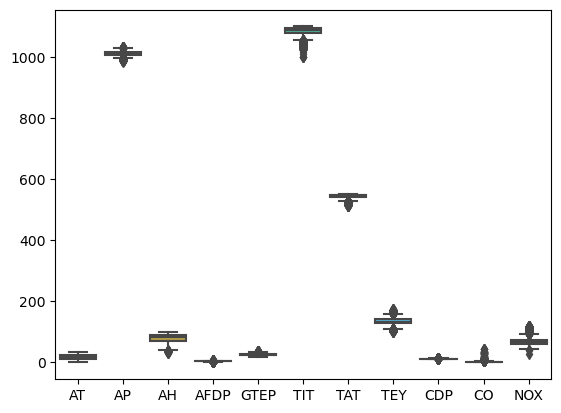

In [116]:
sns.boxplot(data=gas_turbines)

<AxesSubplot:>

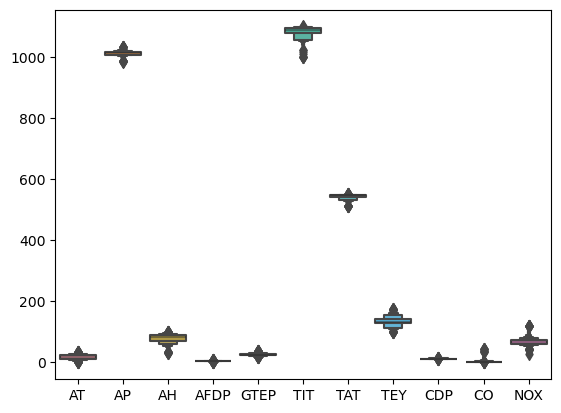

In [117]:
sns.boxenplot(data=gas_turbines)

In [118]:
sns.boxplot(gas_turbines['TEY'],color='green')

<AxesSubplot:>

AT


AP


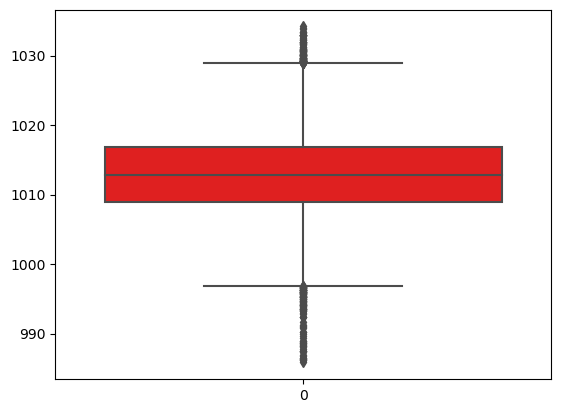

AH


AFDP


GTEP


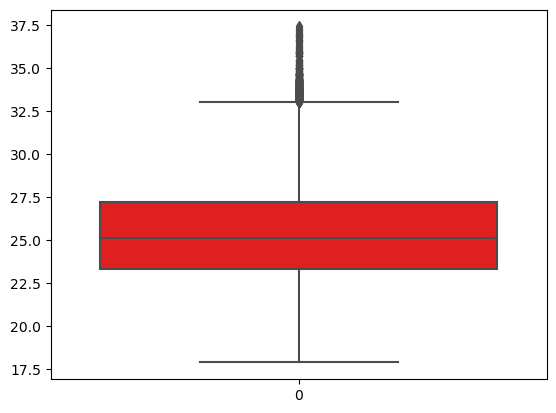

TIT


TAT


TEY


CDP


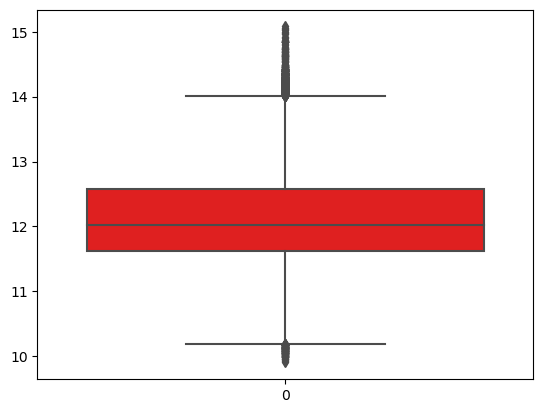

CO


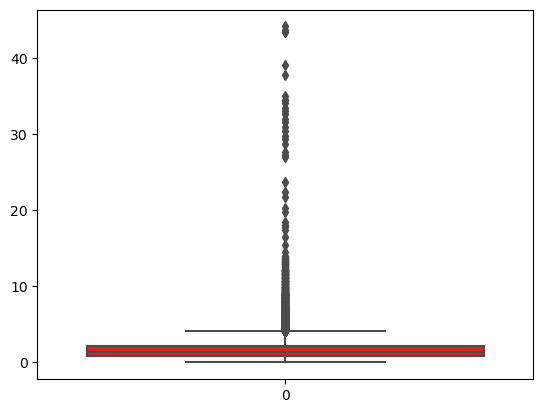

NOX


In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

for i in gas_turbines.columns:
    print(i)
    sns.boxplot(gas_turbines[i],color = 'red')
    plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x16fe3d12730>,
 'caps': [<matplotlib.lines.Line2D at 0x16fe3d12cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16fe3d12460>],
 'medians': [<matplotlib.lines.Line2D at 0x16fe3d1d2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16fe3d1d580>],
 'means': []}

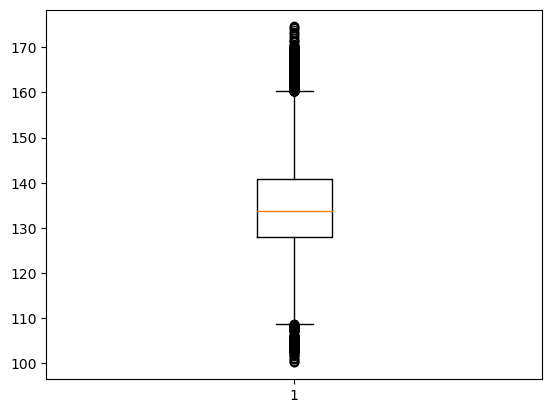

In [120]:
# Boxplot of Turbine Energy Yield (TEY)
plt.boxplot(gas_turbines['TEY'])

<AxesSubplot:>

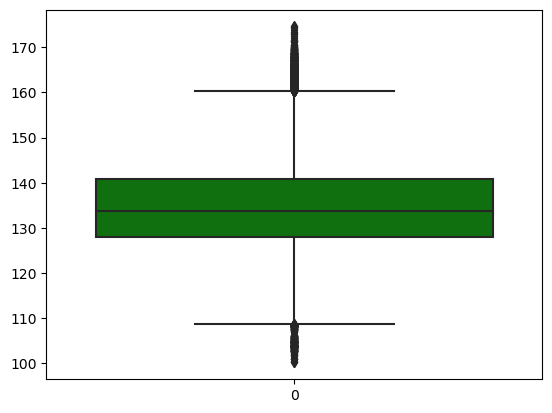

In [121]:
sns.boxplot(gas_turbines['TEY'], color = 'green')

<AxesSubplot:xlabel='variable', ylabel='value'>

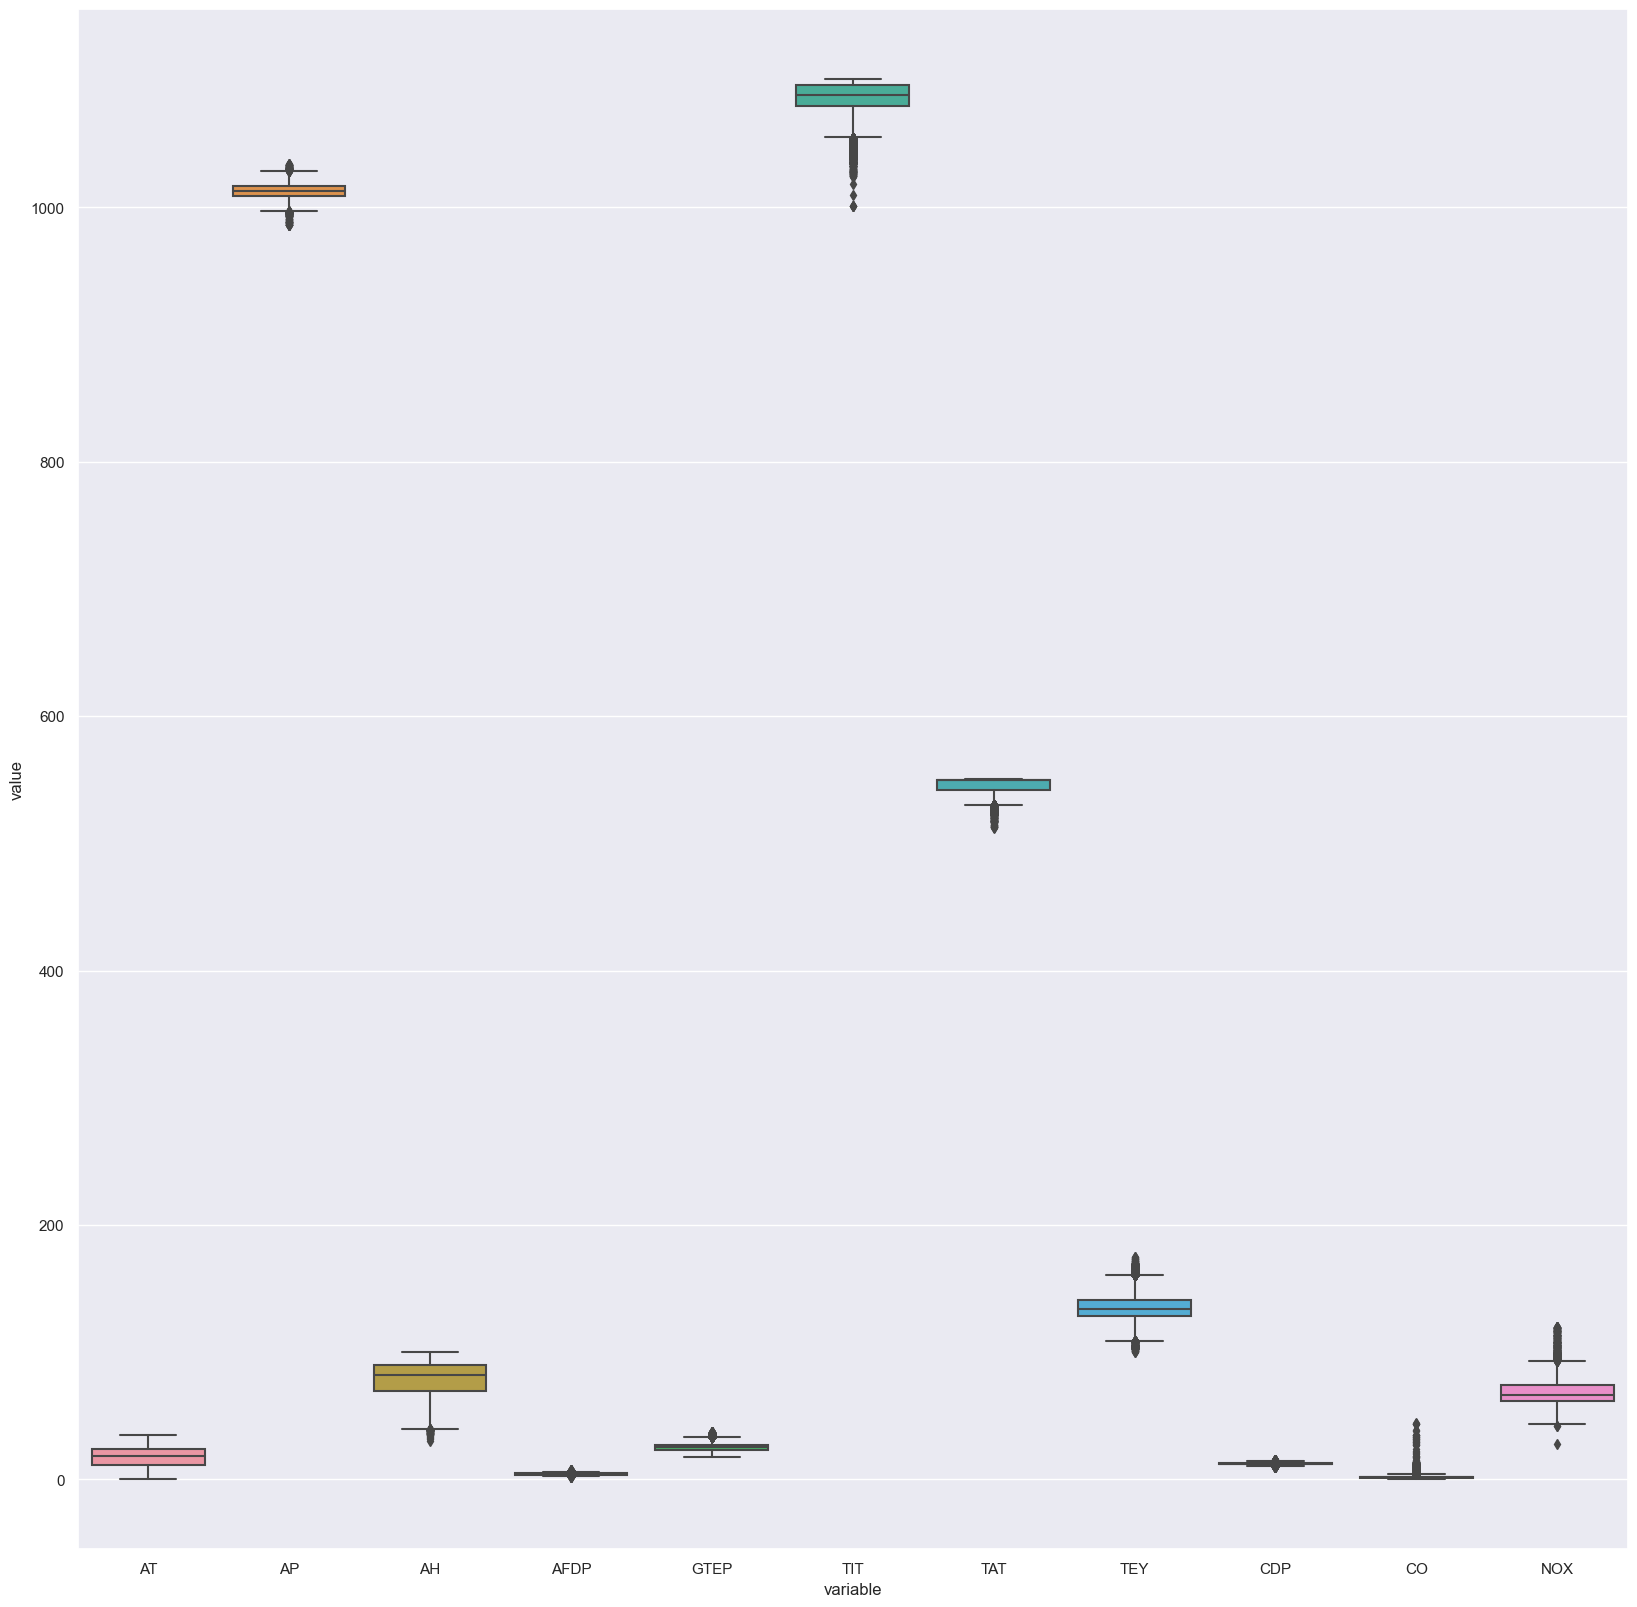

In [122]:
sns.set(rc={'figure.figsize': (20,20)})
sns.boxplot(x="variable",y="value", data=pd.melt(gas_turbines))

In [123]:
sns.pairplot(data=gas_turbines)

<AxesSubplot:ylabel='count'>

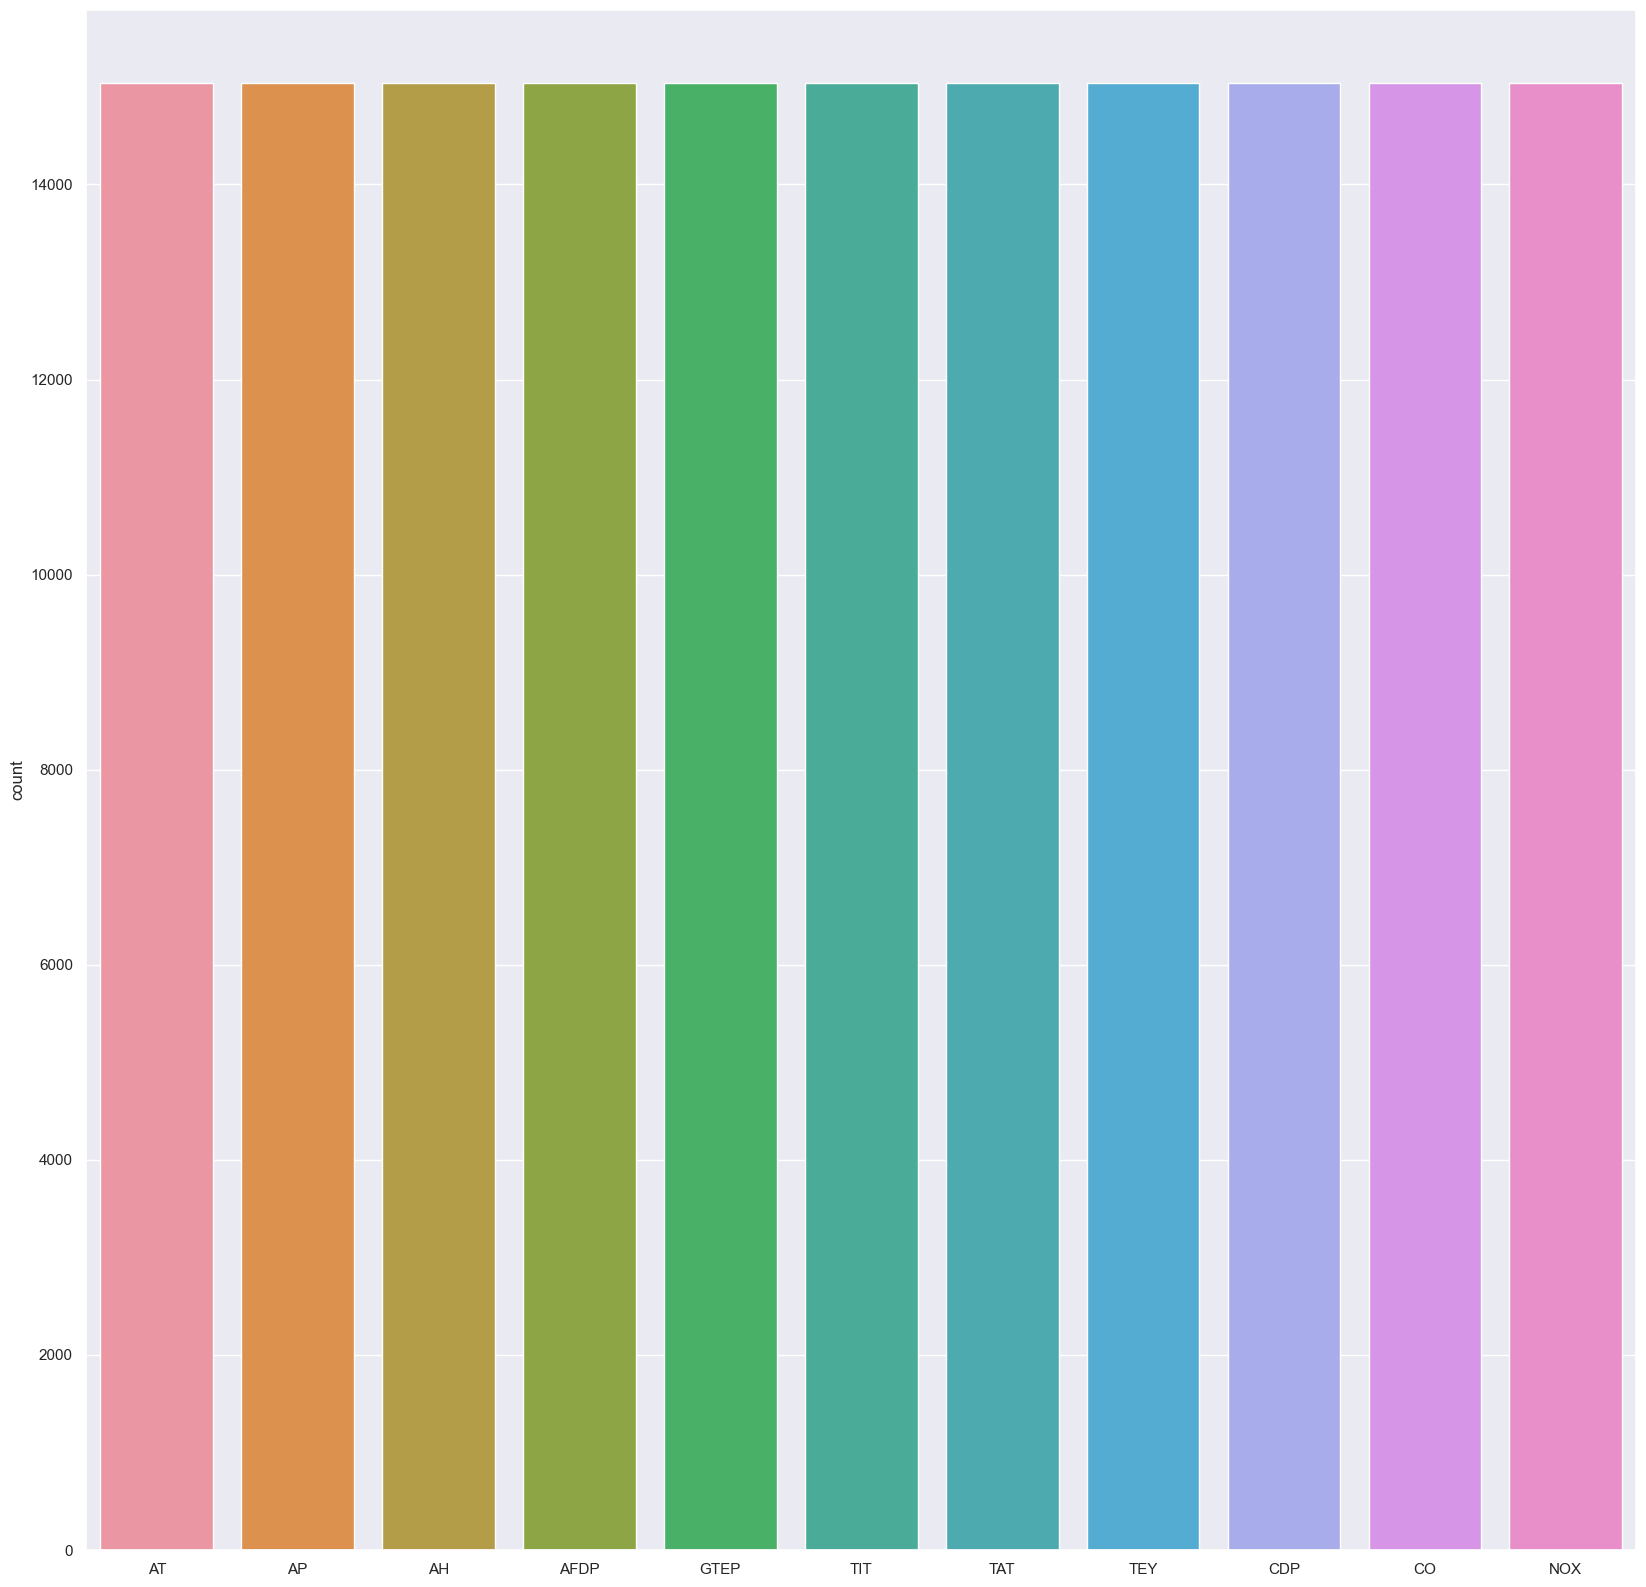

In [124]:
sns.countplot(data=gas_turbines)

<AxesSubplot:>

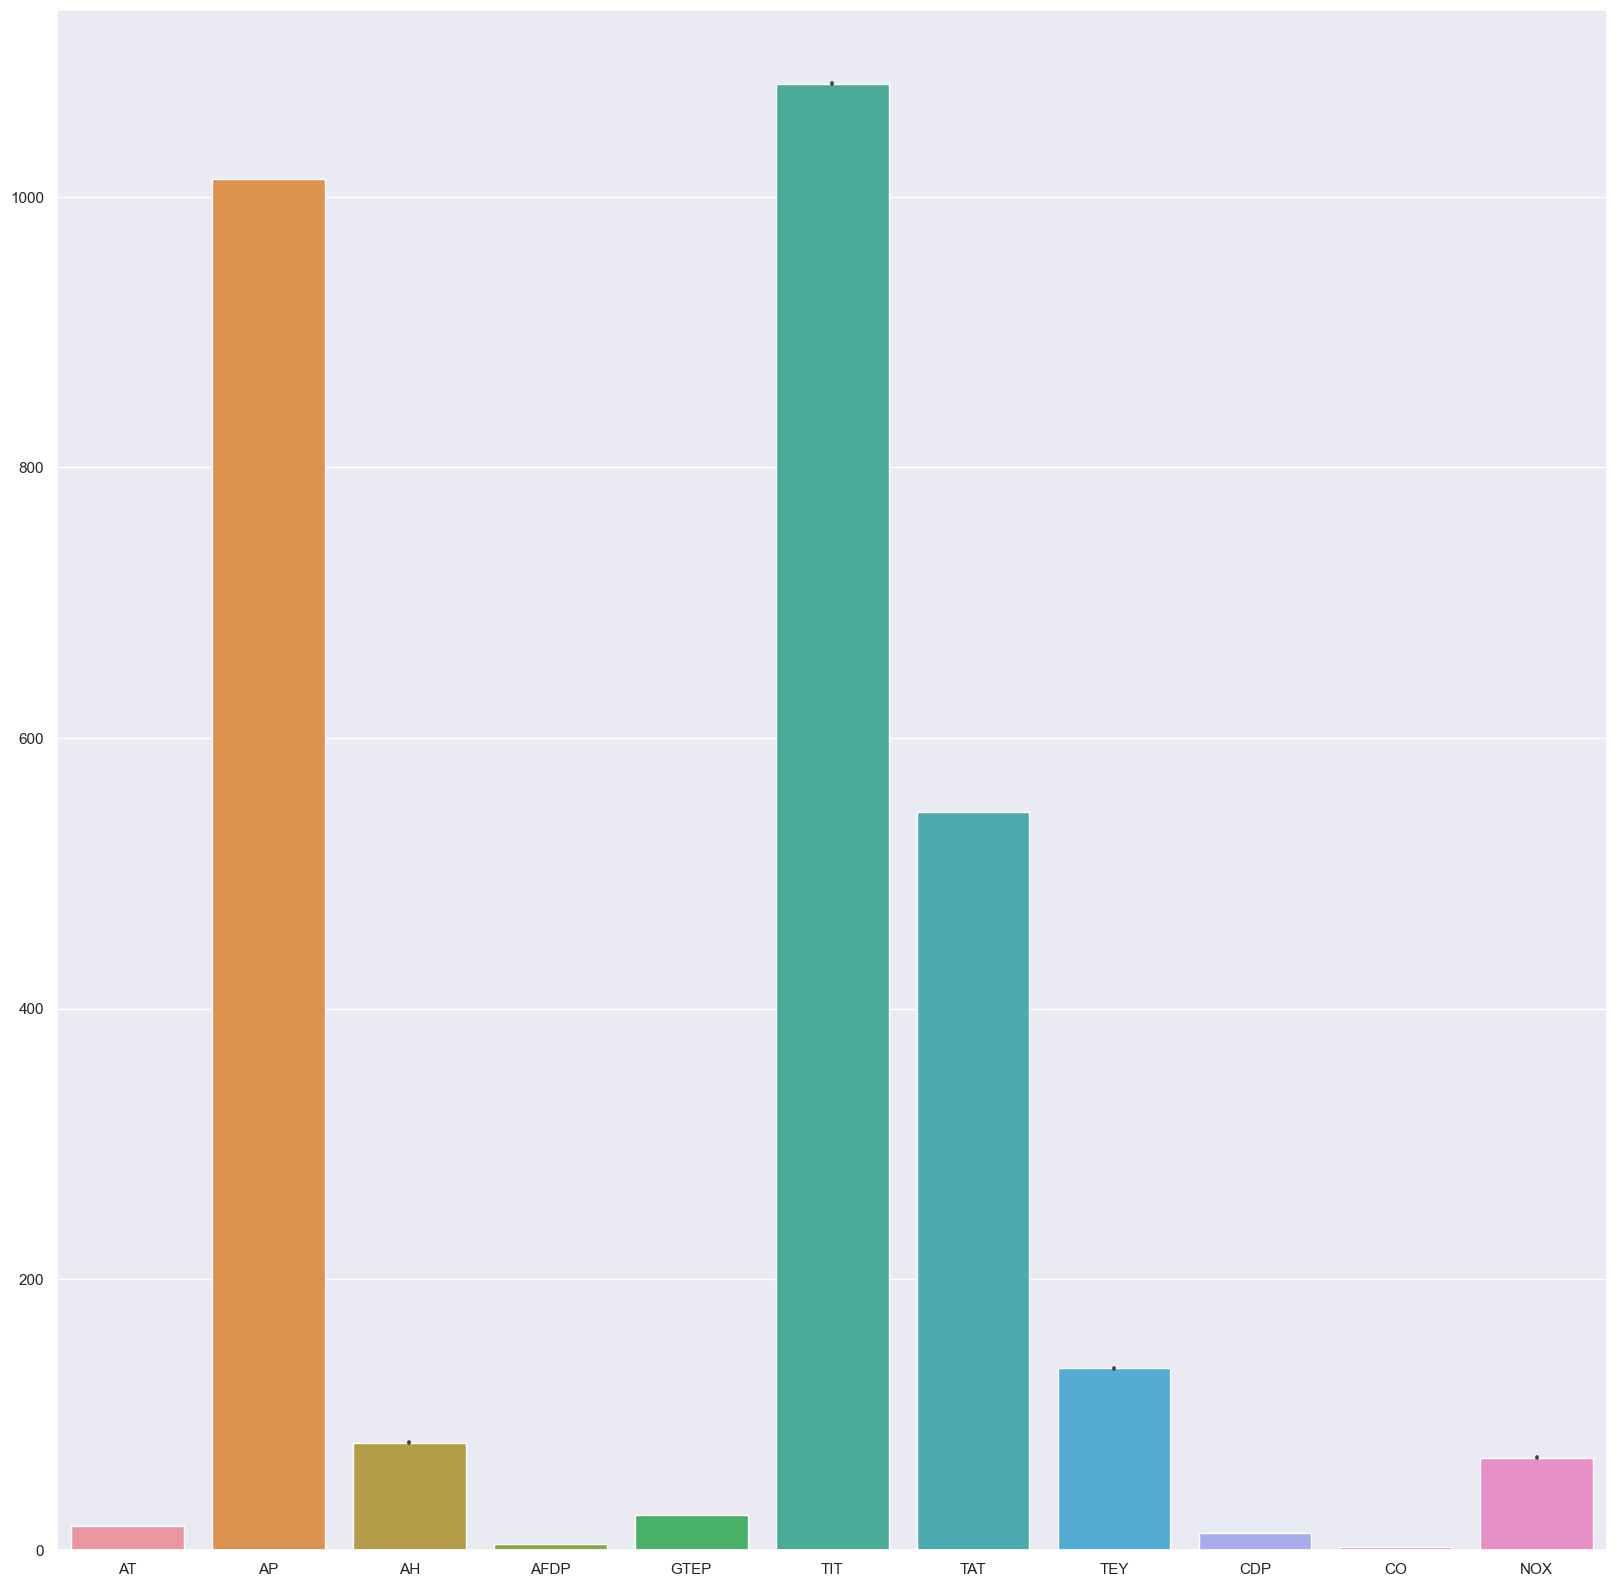

In [125]:
sns.barplot(data=gas_turbines)

<AxesSubplot:>

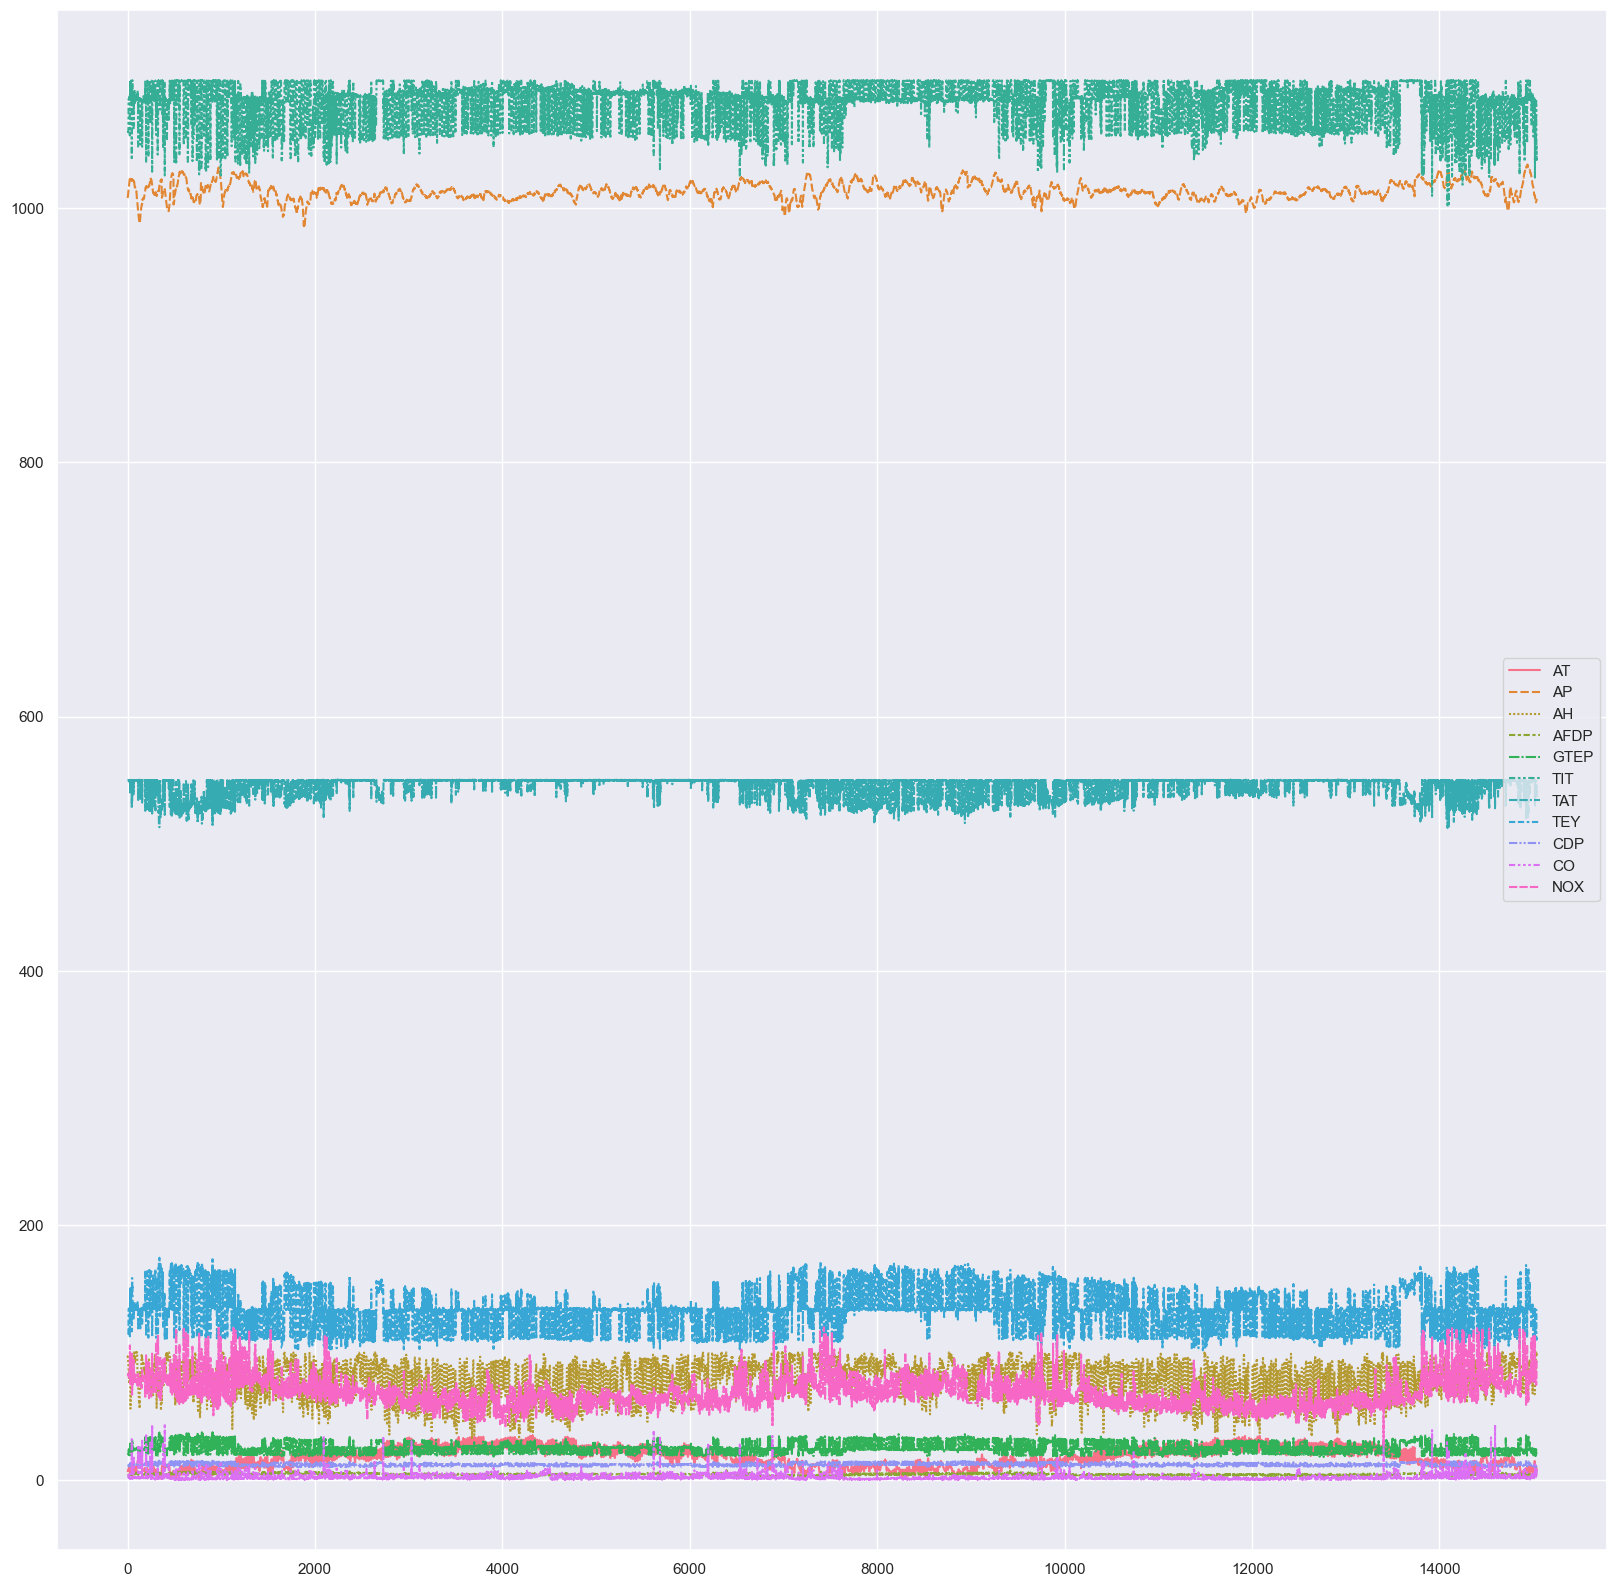

In [126]:
sns.lineplot(data=gas_turbines)

# Independent and Dependent variable

In [127]:
X = gas_turbines.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= gas_turbines.loc[:,['TEY']]

In [128]:
X

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [129]:
y

TEY
0      114.70
1      114.72
2      114.71
3      114.72
4      114.72
...       ...
15034  111.61
15035  111.78
15036  110.19
15037  110.74
15038  111.58

[15039 rows x 1 columns]

# CROSS VALIDATION TECHNIQUE

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [131]:
X

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [132]:
y

array([[-1.23117246],
       [-1.22990897],
       [-1.23054071],
       ...,
       [-1.5160891 ],
       [-1.48134317],
       [-1.42827666]])

In [133]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [134]:
baseline_model

<function __main__.baseline_model()>

In [135]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.18 (0.11) MSE


In [136]:
estimator.fit(X, y)
prediction = estimator.predict(X)
prediction

array([-0.97012794, -0.96298367, -0.99155504, ..., -0.62128985,
       -0.79886997, -0.9205761 ], dtype=float32)

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [138]:
X_train

array([[ 0.99228259,  0.10931361, -1.9088821 , ...,  1.23431552,
        -0.59158909, -1.10283398],
       [-1.4141776 ,  0.76448389,  0.14404619, ...,  1.89514453,
        -0.51892014, -0.06799597],
       [-1.34879664,  0.06251573,  0.97744111, ...,  1.75282608,
        -0.74512631, -0.11298062],
       ...,
       [-1.8583509 ,  1.12326762,  1.00549886, ..., -0.37197942,
        -0.059042  ,  2.32879774],
       [-0.99185517,  0.20290936,  1.40765994, ..., -0.23600637,
        -0.25574498,  0.78594834],
       [ 0.45729948, -1.04503404,  0.40098848, ..., -1.47064165,
         0.12168532, -1.07886127]])

In [139]:
X_test

array([[-1.26856238,  0.23410795,  1.46834298, ...,  1.46365673,
        -0.54047152,  0.02751284],
       [-0.3326324 , -0.10907649,  1.10576725, ...,  1.37300803,
        -0.36797953, -0.13829046],
       [ 0.50918703, -0.77984607, -1.09716487, ...,  1.21618578,
        -0.56271592,  0.6890069 ],
       ...,
       [-0.4166031 ,  0.60849097,  0.92089061, ..., -0.03114031,
        -0.32266269,  0.34546169],
       [-1.17260342,  0.3277037 , -1.60669941, ...,  1.72744444,
        -0.49731477,  0.11070102],
       [-0.84675487, -0.01548073,  0.66648584, ..., -0.20155987,
        -0.46216834,  0.62358336]])

In [140]:
y_train

array([[ 1.14102711],
       [ 1.89280273],
       [ 1.86121552],
       ...,
       [-0.20079763],
       [-0.03275366],
       [-1.49208282]])

In [141]:
y_test

array([[ 1.6337876 ],
       [ 1.37793119],
       [ 1.19788409],
       ...,
       [ 0.06895716],
       [ 1.79677761],
       [-0.03212192]])

In [142]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [143]:
prediction

array([ 1.5941306 ,  1.6572565 ,  0.9608837 , ...,  0.44832823,
        0.6543109 , -0.11933804], dtype=float32)

In [144]:
estimator

In [145]:
X = gas_turbines.drop(columns = ['TEY'], axis = 1) 
y = gas_turbines.iloc[:,7]


In [146]:
X

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [147]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [148]:
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [149]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [150]:
model

In [151]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [152]:
optimizer

In [153]:
model

In [154]:
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 3s - loss: 2576.6094 - mean_squared_error: 2576.6094 - val_loss: 147.6512 - val_mean_squared_error: 147.6512 - 3s/epoch - 9ms/step
Epoch 2/100
381/381 - 1s - loss: 87.4911 - mean_squared_error: 87.4911 - val_loss: 70.5699 - val_mean_squared_error: 70.5699 - 815ms/epoch - 2ms/step
Epoch 3/100
381/381 - 1s - loss: 40.3282 - mean_squared_error: 40.3282 - val_loss: 29.4056 - val_mean_squared_error: 29.4056 - 1s/epoch - 3ms/step
Epoch 4/100
381/381 - 1s - loss: 17.7744 - mean_squared_error: 17.7744 - val_loss: 12.8292 - val_mean_squared_error: 12.8292 - 1s/epoch - 3ms/step
Epoch 5/100
381/381 - 1s - loss: 8.5206 - mean_squared_error: 8.5206 - val_loss: 6.3565 - val_mean_squared_error: 6.3565 - 1s/epoch - 3ms/step
Epoch 6/100
381/381 - 1s - loss: 4.8565 - mean_squared_error: 4.8565 - val_loss: 3.5684 - val_mean_squared_error: 3.5684 - 1s/epoch - 3ms/step
Epoch 7/100
381/381 - 1s - loss: 3.0799 - mean_squared_error: 3.0799 - val_loss: 2.6889 - val_mean_squared_error: 2.6

In [155]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 4ms/step - loss: 0.7435 - mean_squared_error: 0.7435


In [156]:
predictions = model.predict_on_batch(X_test_scaled)

In [157]:
prediction

array([ 1.5941306 ,  1.6572565 ,  0.9608837 , ...,  0.44832823,
        0.6543109 , -0.11933804], dtype=float32)

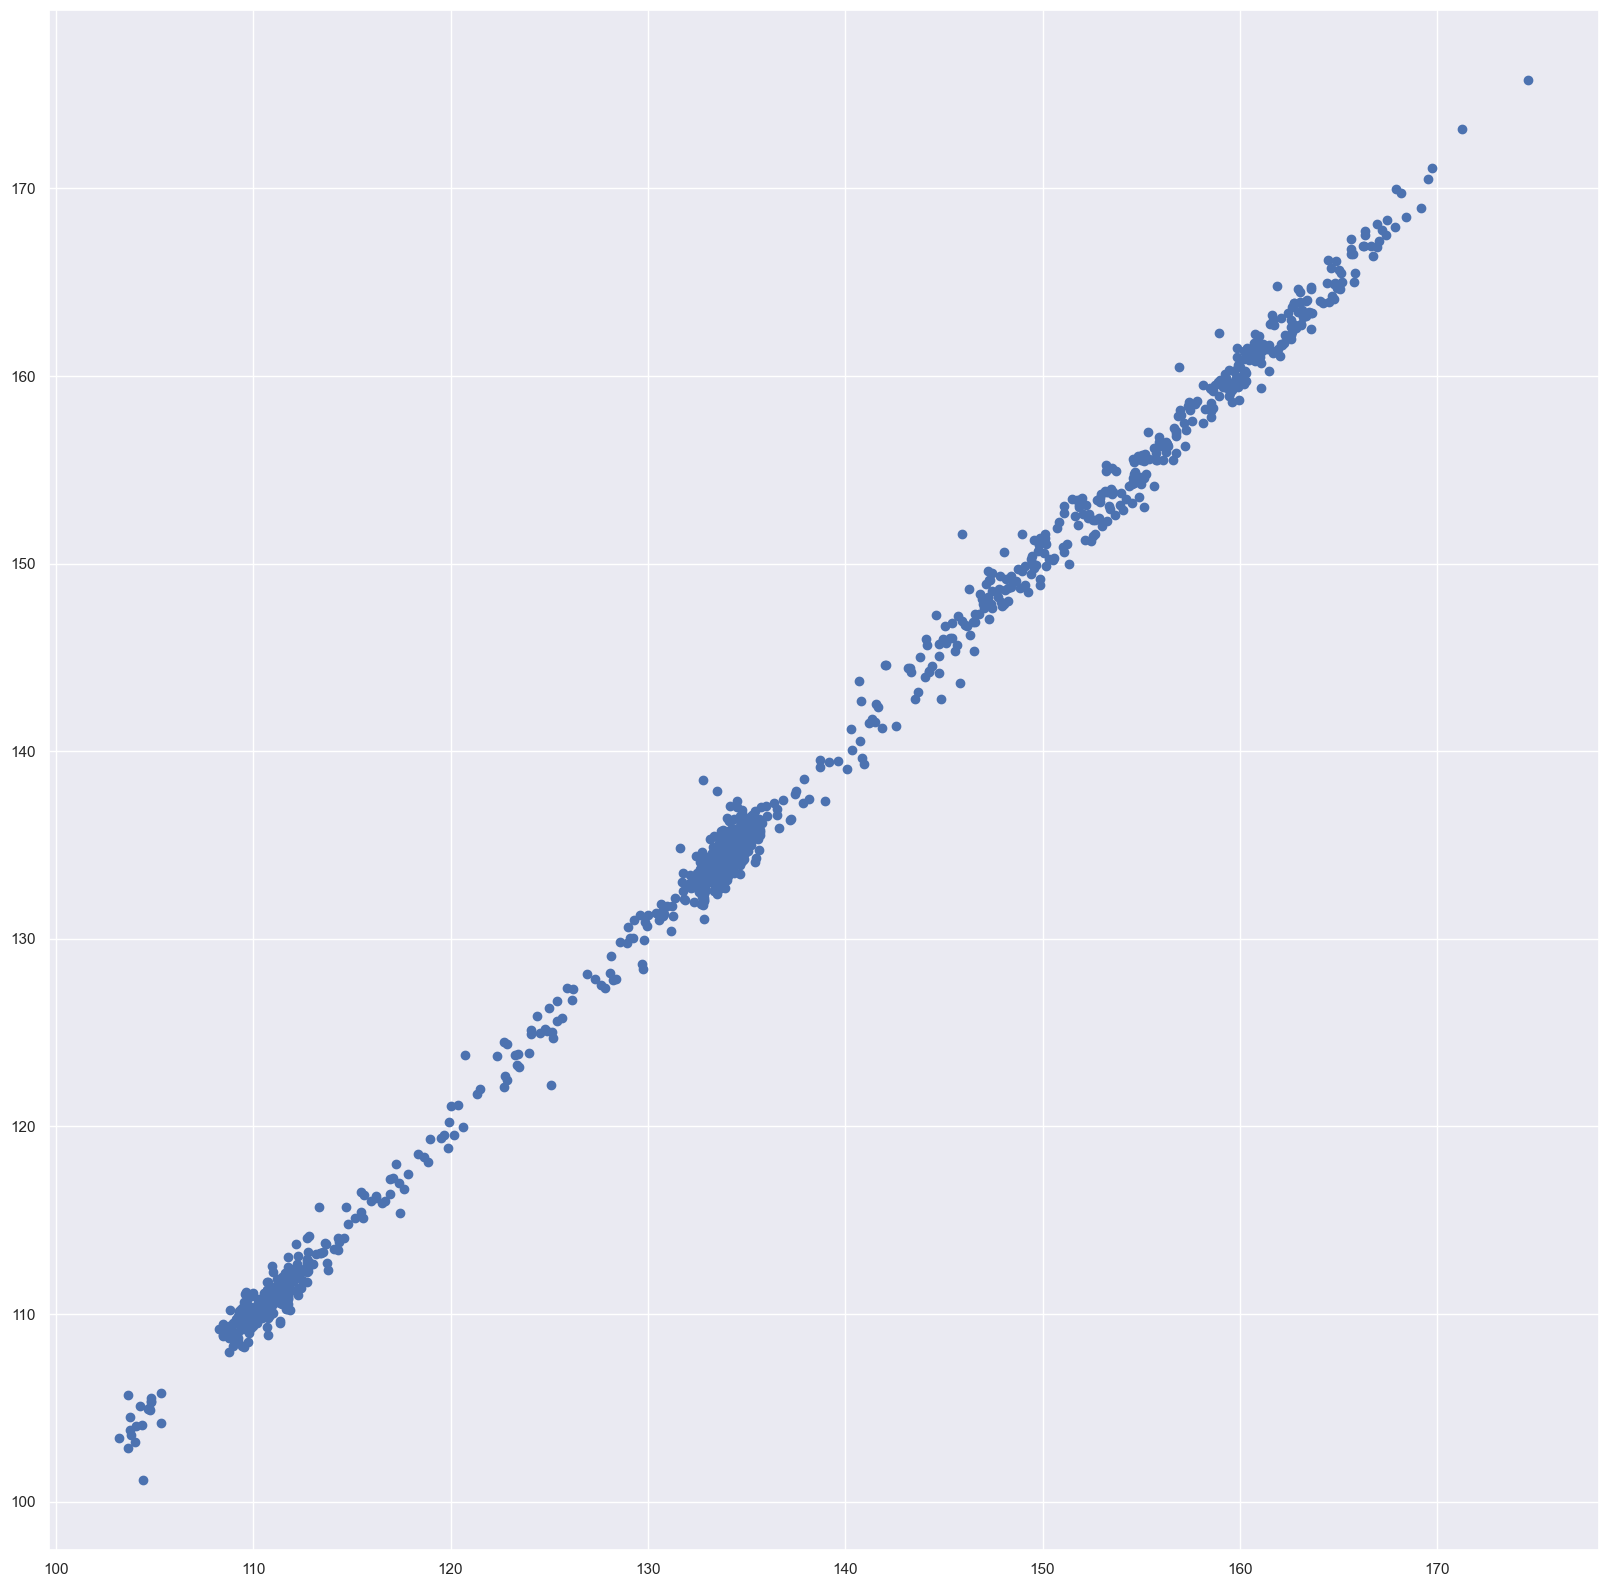

In [158]:

plt.scatter(y_test, predictions)

In [159]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

Actual   Predicted   % Error
0     134.46  135.699539  0.921865
1     111.88  112.274261  0.352397
2     133.72  135.314865  1.192690
3     133.79  134.250305  0.344051
4     110.77  111.258621  0.441113
...      ...         ...       ...
1499  132.85  134.012253  0.874861
1500  125.07  122.194641  2.299000
1501  160.95  162.116287  0.724627
1502  133.12  134.014053  0.671615
1503  111.79  111.010162  0.697592

[1504 rows x 3 columns]